In [1]:
import pandas as pd

import scanpy as sc

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import matplotlib as mpl
mpl.rcParams['svg.fonttype']='none'

In [2]:
import seaborn as sns

In [3]:
reference=pd.read_csv("/home/wull01/liver_project/tumor_cnv/CNV_reanalysis/result/infercnv.references.txt",sep=" ")

In [4]:
observation=pd.read_csv("/home/wull01/liver_project/tumor_cnv/CNV_reanalysis/result/infercnv.observations.txt",sep=" ")

In [16]:
genes=pd.read_csv("/home/wull01/META/META/refdata-gex-GRCh38-2020-A/genes_new.bed",sep="\t",header=None)

In [18]:
genes.columns=['chr','start','end','iD1','iD2','name']

In [21]:
import numpy as np

In [31]:
used_genes=pd.DataFrame(reference.index)

In [34]:
used_genes.columns=['name']

In [36]:
used_genes_infos=pd.merge(used_genes,genes,on='name')

In [38]:
chr3_genes=used_genes_infos.loc[used_genes_infos['chr']=='chr3'].copy()

In [63]:
cytoband_q=pd.read_csv("/home/wull01/META/META/refdata-gex-GRCh38-2020-A/cytoBand_q_arms",sep="\t",header=None)

In [62]:
cytoband_p=pd.read_csv("/home/wull01/META/META/refdata-gex-GRCh38-2020-A/cytoBand_p_arms",sep="\t",header=None)

In [67]:
cytoband_q.columns=['chr','start','end','q','gene']

In [68]:
cytoband_p.columns=['chr','start','end','p','gene']

In [72]:
cytoband_p_max=cytoband_p[['chr','start','end']].groupby('chr').max()

In [74]:
cytoband_q_max=cytoband_q[['chr','start','end']].groupby('chr').max()

In [88]:
cytoband_dict=cytoband_p_max[['end']].to_dict()

In [98]:
cytoband_dict['end']['GL000195.1']=0

In [81]:
cytoband_q_max.head()

,start,end
chr,,
chr1,243500000,248956422
chr10,128800000,133797422
chr11,130900000,135086622
chr12,128700000,133275309
chr13,109600000,114364328


In [101]:
new_data=[]
for key,value in used_genes_infos.groupby('chr'):
    value['band']=(value['end']<=cytoband_dict['end'][key])*1
    new_data.append(value)

In [102]:
used_genes_infos_cytoband=pd.concat(new_data)

In [106]:
chr_level_p={}
chr_level_q={}
for key,value in used_genes_infos_cytoband.groupby('chr'):
    chr_level_p[key]=value.loc[value['band']==1].copy()
    chr_level_q[key]=value.loc[value['band']==0].copy()

In [111]:
for key,value in chr_level_p.items():
    value.to_csv("/home/wull01/META/META/refdata-gex-GRCh38-2020-A/armpq_genes/{}_p.txt".format(key),sep="\t")

In [112]:
for key,value in chr_level_q.items():
    value.to_csv("/home/wull01/META/META/refdata-gex-GRCh38-2020-A/armpq_genes/{}_q.txt".format(key),sep="\t")

In [7]:
chr3p=pd.read_csv("/home/wull01/META/META/refdata-gex-GRCh38-2020-A/armpq_genes/chr3_p.txt",sep="\t",index_col=0)


In [19]:
chr3p_CNV_ref=reference.loc[chr3p['name'].values].copy()
chr3p_CNV_observation=observation.loc[chr3p['name'].values].copy()

chr3p_CNV_ref['ref_mean']=chr3p_CNV_ref.mean(axis=1)
chr3p_CNV_observation['observation_mean']=chr3p_CNV_observation.mean(axis=1)

chr3p_CNV_ref['observation_mean']=chr3p_CNV_observation['observation_mean']



chr3p_CNV_ref[['ref_mean','observation_mean']].to_csv("/home/wull01/liver_project/tumor_cnv/CNV_reanalysis/result/chr3p_ref_observation_mean.txt",sep="\t")

chr3p_CNV_ref_melt=chr3p_CNV_ref[['ref_mean','observation_mean']].melt()

In [38]:
chr3p_CNV_ref_melt.to_csv("/home/wull01/liver_project/source_data/chr3p_cnv_delete.txt",sep="\t")

In [36]:
import scipy.stats as sst

In [37]:
sst.wilcoxon(chr3p_CNV_ref['ref_mean'],chr3p_CNV_ref['observation_mean'])

WilcoxonResult(statistic=0.0, pvalue=1.611595947805442e-37)

In [39]:
####
chr6q=pd.read_csv("/home/wull01/META/META/refdata-gex-GRCh38-2020-A/armpq_genes/chr6_q.txt",sep="\t",index_col=0)

In [40]:
chr6q_CNV_ref=reference.loc[chr6q['name'].values].copy()
chr6q_CNV_observation=observation.loc[chr6q['name'].values].copy()

chr6q_CNV_ref['ref_mean']=chr6q_CNV_ref.mean(axis=1)
chr6q_CNV_observation['observation_mean']=chr6q_CNV_observation.mean(axis=1)

chr6q_CNV_ref['observation_mean']=chr6q_CNV_observation['observation_mean']



chr6q_CNV_ref[['ref_mean','observation_mean']].to_csv("/home/wull01/liver_project/tumor_cnv/CNV_reanalysis/result/chr6q_ref_observation_mean.txt",sep="\t")

chr6q_CNV_ref_melt=chr6q_CNV_ref[['ref_mean','observation_mean']].melt()

In [41]:
sst.wilcoxon(chr6q_CNV_ref['ref_mean'],chr6q_CNV_ref['observation_mean'])

WilcoxonResult(statistic=682.0, pvalue=6.529228686434983e-27)

In [43]:
chr13q=pd.read_csv("/home/wull01/META/META/refdata-gex-GRCh38-2020-A/armpq_genes/chr13_q.txt",sep="\t",index_col=0)

In [44]:
chr13q_CNV_ref=reference.loc[chr13q['name'].values].copy()
chr13q_CNV_observation=observation.loc[chr13q['name'].values].copy()

chr13q_CNV_ref['ref_mean']=chr13q_CNV_ref.mean(axis=1)
chr13q_CNV_observation['observation_mean']=chr13q_CNV_observation.mean(axis=1)

chr13q_CNV_ref['observation_mean']=chr13q_CNV_observation['observation_mean']



chr13q_CNV_ref[['ref_mean','observation_mean']].to_csv("/home/wull01/liver_project/tumor_cnv/CNV_reanalysis/result/chr13q_ref_observation_mean.txt",sep="\t")

chr13q_CNV_ref_melt=chr13q_CNV_ref[['ref_mean','observation_mean']].melt()

In [45]:
sst.wilcoxon(chr13q_CNV_ref['ref_mean'],chr13q_CNV_ref['observation_mean'])

WilcoxonResult(statistic=0.0, pvalue=7.393547603776528e-27)

In [49]:
##chr1
chr1p=pd.read_csv("/home/wull01/META/META/refdata-gex-GRCh38-2020-A/armpq_genes/chr1_p.txt",sep="\t",index_col=0)


In [50]:
chr1p_CNV_ref=reference.loc[chr1p['name'].values].copy()
chr1p_CNV_observation=observation.loc[chr1p['name'].values].copy()

chr1p_CNV_ref['ref_mean']=chr1p_CNV_ref.mean(axis=1)
chr1p_CNV_observation['observation_mean']=chr1p_CNV_observation.mean(axis=1)

chr1p_CNV_ref['observation_mean']=chr1p_CNV_observation['observation_mean']



chr1p_CNV_ref[['ref_mean','observation_mean']].to_csv("/home/wull01/liver_project/tumor_cnv/CNV_reanalysis/result/chr1p_ref_observation_mean.txt",sep="\t")

chr1p_CNV_ref_melt=chr1p_CNV_ref[['ref_mean','observation_mean']].melt()

In [51]:
sst.wilcoxon(chr1p_CNV_ref['ref_mean'],chr1p_CNV_ref['observation_mean'])

WilcoxonResult(statistic=35701.0, pvalue=2.7024364690218307e-15)

In [54]:
##chr1
chr1q=pd.read_csv("/home/wull01/META/META/refdata-gex-GRCh38-2020-A/armpq_genes/chr1_q.txt",sep="\t",index_col=0)

chr1q_CNV_ref=reference.loc[chr1q['name'].values].copy()
chr1q_CNV_observation=observation.loc[chr1q['name'].values].copy()

chr1q_CNV_ref['ref_mean']=chr1q_CNV_ref.mean(axis=1)
chr1q_CNV_observation['observation_mean']=chr1q_CNV_observation.mean(axis=1)

chr1q_CNV_ref['observation_mean']=chr1q_CNV_observation['observation_mean']



chr1q_CNV_ref[['ref_mean','observation_mean']].to_csv("/home/wull01/liver_project/tumor_cnv/CNV_reanalysis/result/chr1q_ref_observation_mean.txt",sep="\t")

chr1q_CNV_ref_melt=chr1q_CNV_ref[['ref_mean','observation_mean']].melt()

In [55]:
sst.wilcoxon(chr1q_CNV_ref['ref_mean'],chr1q_CNV_ref['observation_mean'])

WilcoxonResult(statistic=0.0, pvalue=2.4618505255431396e-73)

(0.98, 1.1)

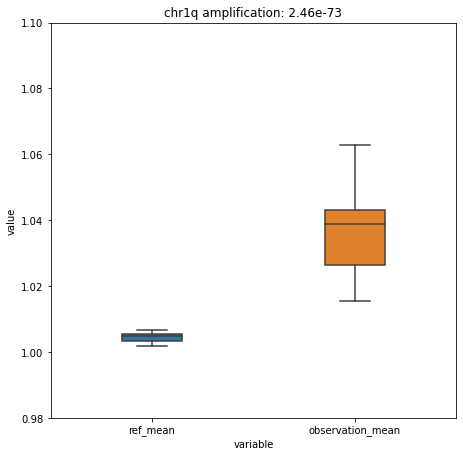

In [75]:
figure=plt.figure(figsize=(16,16))
ax1=figure.add_subplot(221)
sns.boxplot(x='variable',y='value',data=chr1q_CNV_ref_melt,width=0.3,ax=ax1)
ax1.set_title("chr1q amplification: 2.46e-73")
ax1.set_ylim([0.98,1.1])

In [76]:
figure.savefig("CNV_amplifiaction_cytoband_review2.svg")

<AxesSubplot:xlabel='variable', ylabel='value'>

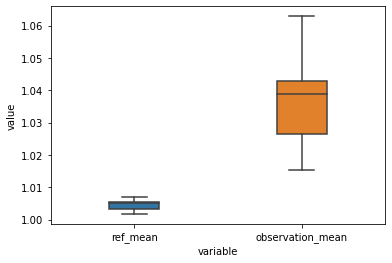

In [56]:
sns.boxplot(x='variable',y='value',data=chr1q_CNV_ref_melt,width=0.3)

(0.95, 1.1)

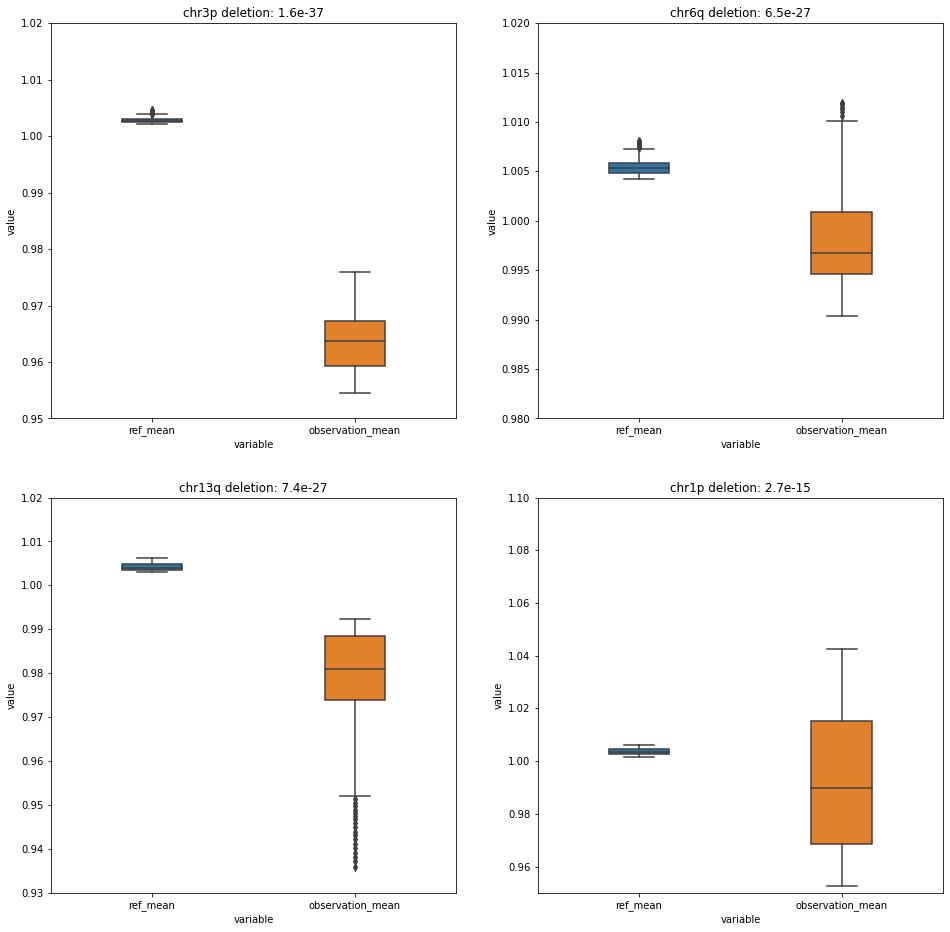

In [71]:
figure=plt.figure(figsize=(16,16))
ax1=figure.add_subplot(221)
sns.boxplot(x='variable',y='value',data=chr3p_CNV_ref_melt,width=0.3,ax=ax1)
ax1.set_title("chr3p deletion: 1.6e-37")
ax1.set_ylim([0.95,1.02])
ax2=figure.add_subplot(222)
sns.boxplot(x='variable',y='value',data=chr6q_CNV_ref_melt,width=0.3,ax=ax2)
ax2.set_title("chr6q deletion: 6.5e-27")
ax2.set_ylim([0.98,1.02])
ax3=figure.add_subplot(223)
sns.boxplot(x='variable',y='value',data=chr13q_CNV_ref_melt,width=0.3,ax=ax3)
ax3.set_title("chr13q deletion: 7.4e-27")
ax3.set_ylim([0.93,1.02])
ax4=figure.add_subplot(224)
sns.boxplot(x='variable',y='value',data=chr1p_CNV_ref_melt,width=0.3,ax=ax4)
ax4.set_title("chr1p deletion: 2.7e-15")
ax4.set_ylim([0.95,1.1])

In [72]:
figure.savefig("CNV_deletion_cytoband_review2.svg")

In [77]:
%pwd

'/home/wull01/liver_project'

In [42]:
chr3_reference=reference.loc[chr3_genes['name'].values].copy()
chr3_observation=observation.loc[chr3_genes['name'].values].copy()



In [48]:
chr3_genes

,name,chr,start,end,iD1,iD2
1546,TRNT1,chr3,3126933,3150879,ENSG00000072756,ENSG00000072756
1547,CRBN,chr3,3144628,3179727,ENSG00000113851,ENSG00000113851
1548,SUMF1,chr3,3700814,4467273,ENSG00000144455,ENSG00000144455
1549,BHLHE40,chr3,4979437,4985323,ENSG00000134107,ENSG00000134107
1550,ARL8B,chr3,5122245,5180912,ENSG00000134108,ENSG00000134108
...,...,...,...,...,...,...
2018,MELTF,chr3,196988621,197029817,ENSG00000163975,ENSG00000163975
2019,DLG1,chr3,197042560,197299330,ENSG00000075711,ENSG00000075711
2020,FYTTD1,chr3,197737179,197787596,ENSG00000122068,ENSG00000122068
2021,LRCH3,chr3,197791226,197888436,ENSG00000186001,ENSG00000186001


In [50]:
?sns.clustermap

In [55]:
chr3_reference['mean_copy_number']=chr3_reference.mean(axis=1)

In [56]:
chr3_observation['mean_copy_number']=chr3_observation.mean(axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x14e50c606bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x14e50c6315b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14e50ccb7dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x14e50cb861f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14e50cc4da00>],
 'means': []}

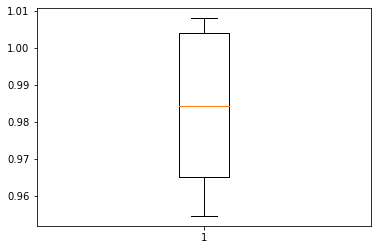

In [59]:
plt.boxplot(chr3_reference['mean_copy_number'])
plt.boxplot(chr3_observation['mean_copy_number'])

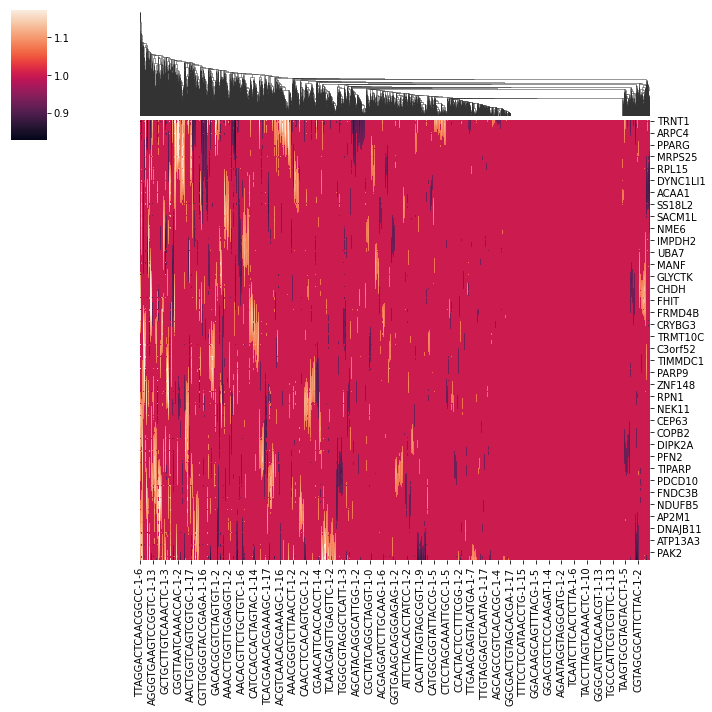

In [51]:
sns.clustermap(chr3_reference,row_cluster=False)

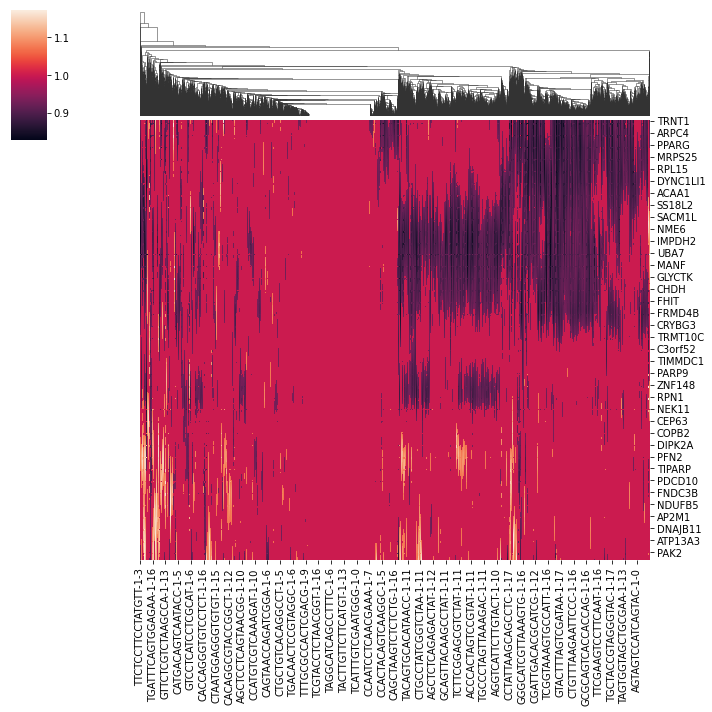

In [52]:
sns.clustermap(chr3_observation,row_cluster=False)

In [37]:
used_genes_infos.head()

,name,chr,start,end,iD1,iD2
0,NOC2L,chr1,944203,959309,ENSG00000188976,ENSG00000188976
1,HES4,chr1,998962,1000172,ENSG00000188290,ENSG00000188290
2,ISG15,chr1,1001138,1014540,ENSG00000187608,ENSG00000187608
3,AGRN,chr1,1020120,1056118,ENSG00000188157,ENSG00000188157
4,SDF4,chr1,1216908,1232067,ENSG00000078808,ENSG00000078808
